# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [480]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------

import wn
import hebrew_tokenizer as ht

# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.decomposition import TruncatedSVD #For Dimensionality reduction, we have close ~35k unique words in the test set which means 35k features.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer #imported for scoring
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [481]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [482]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [483]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [484]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [485]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [486]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [487]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [488]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [489]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   753 non-null    object
 1   gender  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


,story,gender
count,753,753
unique,749,2
top,בשנה האחרונה נדבקתי וחליתי בנגיף הקורונה. עד ה...,m
freq,2,575


Duplicates detected, no nulls

In [490]:
df_train_clean = df_train.drop_duplicates()
df_train_clean.describe()

,story,gender
count,750,750
unique,749,2
top,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m
freq,2,573


Text(0.5, 1.0, 'Authors split by gender')

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

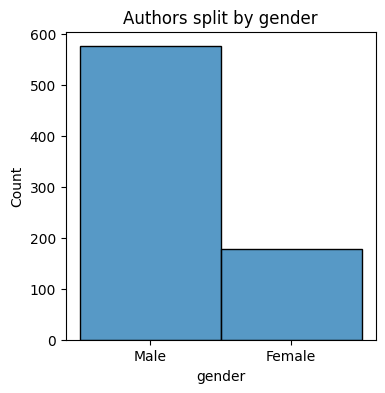

In [491]:
fig, ax = plt.subplots(figsize=(4,4))
fg = sns.histplot(df_train['gender'], ax=ax)
fg.set_title("Authors split by gender")
fg.set_xticklabels(['Male','Female'])
plt.show()

Splitting the train set to X and y but different names.

In [492]:
story_list = df_train_clean["story"].values.tolist()
gender_chars = df_train_clean["gender"].values.tolist()

#List of stories to classify as extracted from the test set
story_test_list =  df_test["story"].values.tolist()

In [493]:
def tokenizator(input_text):#Tokenizer function using the hebrew_tokenizer we imported prior
    lst = []
    tokens = ht.tokenize(input_text) #Tokenizing using the hebrewtokenizer, each token is a single word separated by spaces.
    dont_keep = ['PUNCTUATION', 'ENGLISH'] #Opting out of keeping all these because their value in our application comes from deeper token analysis which we do not perform at this stage.
    for grp, token, token_num, (start_index, end_index) in tokens:
        if not grp in dont_keep:   
            lst.append((grp, token)) #Extracting the wanted tokens into an output list

    outlst = []
    toknum = len(lst)
    i=0
    while i < toknum-1:
        if lst[i][0] in ['DATE','HOUR']: #If the current token is date/time data we throw the previous word out "בשעה: X" etc
            outlst.pop()
            i+=1
        if len(lst[i][1]) < 3: #We throw words with under 3 letters out to get rid of connectors, connectors would be more useful if we'd go farther down the n-gram range but in out use case theyre mostly noise
            i+=1
        else:
            outlst.append(lst[i][1])
            i+=1
        
    return outlst

In [494]:
def plot_coefficients(classifier, feature_names, top_features=20): #Plots the coefficients of the most impactful "top_features" features

    #Getting coefficients from classifier in 1d
    class_coef = classifier.coef_[0]

    #RtL text
    for i in range(len(feature_names)):
        feature_names[i] = feature_names[i][::-1]

    #Getting top and bottom features into sorted array
    top_positive_coefficients = np.argsort(class_coef)[-top_features:]
    top_negative_coefficients = np.argsort(class_coef)[:top_features]

    #Connecting the arrays
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    #
    colors = ["Female" if c < 0 else "Male" for c in class_coef[top_coefficients]]
    

    fig, ax = plt.subplots(figsize=(20,4))
    fg = sns.barplot(y=class_coef[top_coefficients], x=feature_names[top_coefficients], hue= colors, dodge=False)
    fg.set_title(str(top_features) + " most impactful features")
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha="right")
    plt.show()

In [495]:
def find_best_ncomp(scope,clf,  X,y): #Finds the best number of components argument for our LSA
    performance = []
    test = scope  
    cv_scorer = make_scorer(metrics.f1_score, average='macro')
    

    for n in test: #`n` must be an integer satisfying `0 < n < min(X.shape)`.
        svd_test = TruncatedSVD(n_components=n ,algorithm= 'arpack')
        lsa_test = svd_test.fit_transform(X)
        clf.fit(lsa_test, y)
        pred = clf.predict(lsa_test)

        cv_scores = cross_val_score(clf, X= lsa_test, y= y, cv = 10, scoring=cv_scorer)
        clf_score = cv_scores.mean()

        performance.append(clf_score)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(test, performance, 'ro--')
    plt.title('Score by n-components');

    return performance

In [496]:
def runtest(clf, X_train, y_train): #Tests classifier and prints results in form of cross-validation score and confusion matrix
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)

    cv_scorer = make_scorer(metrics.f1_score, average='macro')
    clf_score = cross_val_score(clf, X= X_train, y= y_train, cv = 10, scoring=cv_scorer).mean()

    print(pd.DataFrame(metrics.confusion_matrix(y_pred=pred ,y_true=y_train),  columns=['Female','Male'] ,index=['Female','Male']))

    return clf_score

In [497]:
def find_best_params(clf, parameters, X_train, y_train): #Takes classifier and parameter grid, returns best parameters according to GridSearchCV

    cv_scorer = make_scorer(metrics.f1_score, average='macro')
    grid = GridSearchCV(clf, parameters, scoring = cv_scorer)    
    grid.fit(X_train, y_train)
    
    print(grid.best_params_)
    return grid.best_params_

We use tf-idf rather than word counts because counts will add alot of noise in our use context.
ngram_range wise we use (1,2)| In hebrew there is additional gender-related information in verbs, if used in tandem with, for example: "הייתי צריכה\צריך" would be completely lost information. (n>2)-grams wouldn't add much.
We have 2 categories; assuming there is equal chance to be female or male (1/2). With this and in infference from the above, our max_df value could safely go to 0.5 without losing much information. 
Meaningful verbs are likely to reoccur in the story; say, a story has actions described in it, central actions to the story reoccur (taken that a story is an actual story and not a sentence).

In [498]:
#Binary count vectorizer for bernoulliNB experiment
ber_vect = CountVectorizer(tokenizer=tokenizator, binary=True, max_df=0.5, min_df=2, ngram_range= (1,2))

#tf-idf count vectorizer with "sublinear_tf=True and use_idf=True" as suggested by TruncatedSVD documentation for later lsa.
red_vect = TfidfVectorizer(tokenizer=tokenizator, sublinear_tf=True, use_idf=True, max_df=0.5, min_df=2, ngram_range= (1,2)) 

X_train_ber = ber_vect.fit_transform(story_list)
X_train_red = red_vect.fit_transform(story_list)

#Converting 'f' and 'm' to 0 and 1 respectively
gender_encoder = preprocessing.LabelEncoder()
y_train_normalized = gender_encoder.fit_transform(gender_chars)

#Shapes of resulting sparse matrixes
X_train_ber.shape
X_train_red.shape

(750, 31940)

(750, 31940)

In a naive approach, a single appearence of some words could already be a decisive factor in classifying author genders.

In order to test this claim, I want to try and train a BernoulliNB classifier with binary train data of word appearances 

In [499]:
from sklearn.naive_bayes import BernoulliNB

clfBNB = BernoulliNB()
BNB_score = runtest(clfBNB,X_train_ber, y_train_normalized)
print("Cross-val score for BernoulliNB with default args: "+str(BNB_score))

        Female  Male
Female     143    34
Male         2   571
Cross-val score for BernoulliNB with default args: 0.48490170127040966


In [500]:
#Finding best params
paramsforBNB =  {'alpha' : np.logspace(-6, 6, 13), 'fit_prior' : [True, False]}
BNB_bestparams = find_best_params(clfBNB, paramsforBNB, X_train_ber, y_train_normalized)

#Extracting the params and retraining the classifier using them
alpha_arg= BNB_bestparams['alpha']
fitprior_arg= BNB_bestparams['fit_prior']

clfBNB = BernoulliNB(alpha= alpha_arg, fit_prior=fitprior_arg)

#Testing the results of the new classifier and printing to screen
BNB_score = runtest(clfBNB,X_train_ber, y_train_normalized)
print("Cross-val score for BernoulliNB with tuned args: "+str(BNB_score))

{'alpha': 0.1, 'fit_prior': False}
        Female  Male
Female     177     0
Male         2   571
Cross-val score for BernoulliNB with tuned args: 0.5999037320290981


We can see that indeed with minimal parameter tuning we get very high accuracy in predictions on the train set. The cross validation score on the other hand is very low and points to overfitting

Were going to train a Ridge classifier in order to find and visualize some heavily impactful features.

RidgeClassifier(class_weight='balanced')

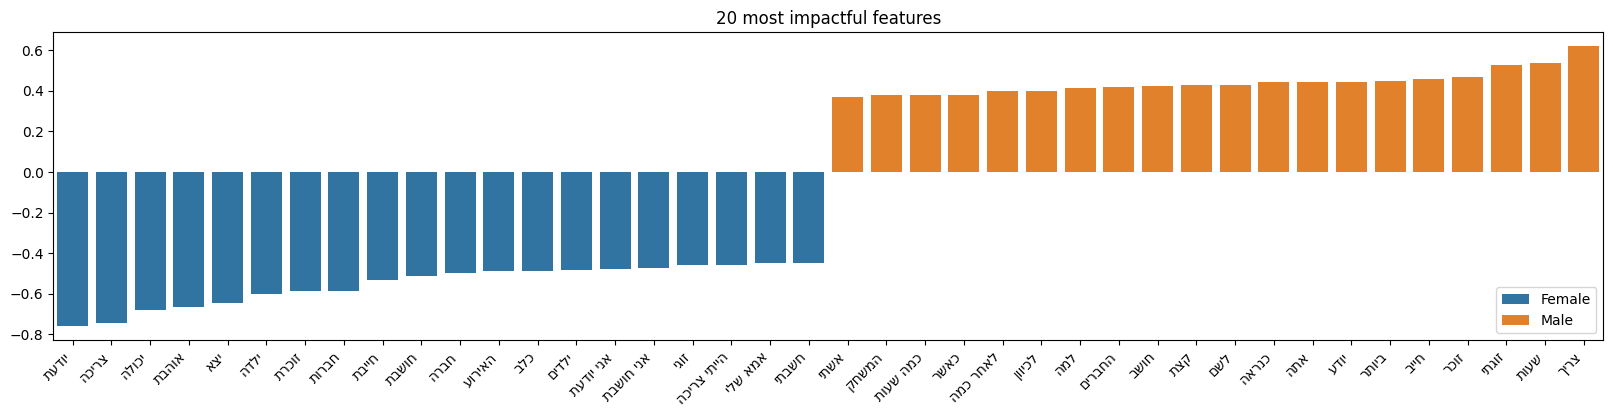

        Female  Male
Female     177     0
Male         2   571
Cross-val score for Ridge with default args: 0.6147465245096526


In [501]:
clfRidgebase = RidgeClassifier(class_weight='balanced') #Balanced to offset the train set imbalance
clfRidgebase.fit(X_train_red, y_train_normalized)
pred = clfRidgebase.predict(X_train_red)

plot_coefficients(clfRidgebase, red_vect.get_feature_names_out())

#Testing with default params
clfRidgebase_score = runtest(clfRidgebase,X_train_red, y_train_normalized)
print("Cross-val score for Ridge with default args: "+str(clfRidgebase_score))

We can see that most of the words are verbs which are the words that offer the most gender-related information in hebew while the other words like 'למה, כלב' which to naked eye offer 0 information. 

We can also see that proportion of these apparent "noise" words isnt balanced, the male side has noticably more which is probably attributed to the heavy gender imbalance in the train set and or due to verbs in the third-person form are same as in male which i feel in a way limits the reliability of male-positive features and skews our preference towards valuing female-positive features more.

If we were allowed to add certain stop words like "היא, הוא , אני" etc so we could then analyze the next word in context and nullify the impact of males talking about females' actions and the reverse.
 *For example in case of a bi-gram "היא אוהבת/צריכה" (not mandatory to have these exact words, just a verb ending on ת or ה in case the previous was היא)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Before going deeper into experimentation with classifiers I want to reduce the dimensionality of our problem. Before running LSA using truncatedSVD we are on ~32k features.

521


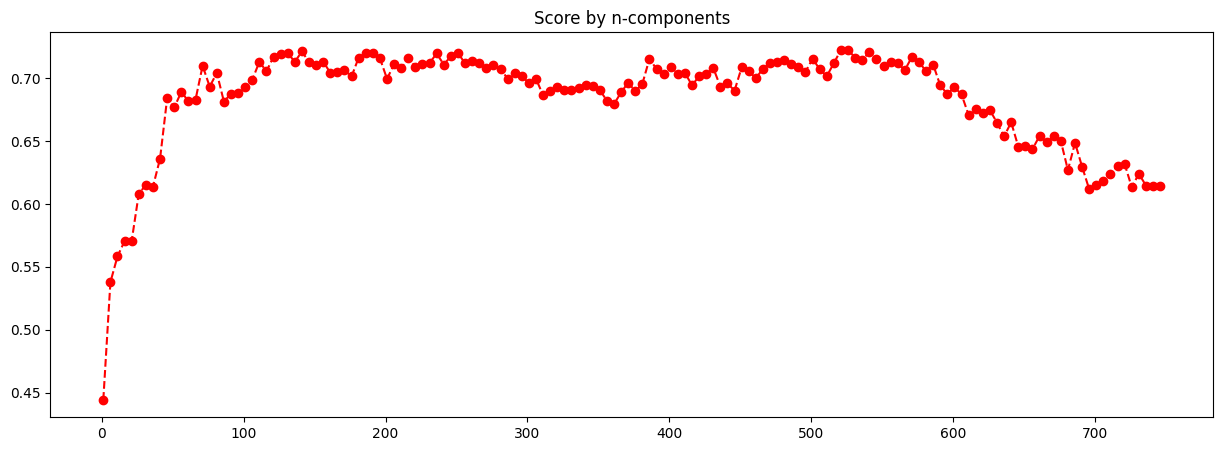

In [502]:
ncomp_results = find_best_ncomp(scope = range(1,  min(X_train_red.shape) -1 , 5) ,clf = clfRidgebase ,X=X_train_red , y=y_train_normalized)
fin_ncomps = ncomp_results.index(max(ncomp_results))* 5 + 1
print(fin_ncomps) # 521

After the first run of our finder, I want to tighten the scope and run it again

518


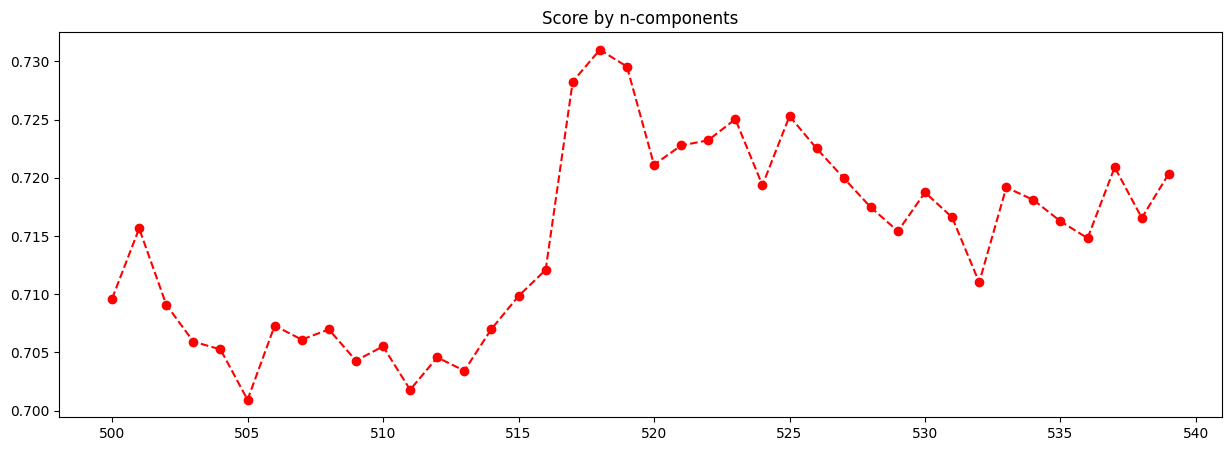

In [503]:
ncomp_results = find_best_ncomp(scope = range(fin_ncomps-21,  fin_ncomps+19 , 1) ,clf = clfRidgebase ,X=X_train_red , y=y_train_normalized)
fin_ncomps = ncomp_results.index(max(ncomp_results)) + fin_ncomps-21 #518
print(fin_ncomps)

In [504]:
redSVD = TruncatedSVD(n_components=fin_ncomps,algorithm= 'arpack') 
####   SVD results are not normalized!!!! 

X_train_postLSA = redSVD.fit_transform(X_train_red)
explained_variance = redSVD.explained_variance_ratio_.sum()
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")


Explained variance of the SVD step: 79.0%


We can see we managed to lower our feature count to just 518 while at the same time improving our f1-macro prediction score to 0.73+

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Next I want to experiment with solving our problem using LogisticRegression()

In [ ]:
#Testing with default params
clfLogreg = LogisticRegression()
clfLR_score = runtest(clfLogreg,X_train_postLSA, y_train_normalized)
print("Cross-val score for Logistic Regression with default args: "+str(clfLR_score))

In [ ]:
#Finding best params
paramsforLogreg = {'C' : np.logspace(-6, 6, 13), 'solver' : ['liblinear'], 'class_weight' : ['balanced', None], 'max_iter' : [1,10,100,1000,2000,5000,10000]}
Logreg_bestparams = find_best_params(clfLogreg, paramsforLogreg, X_train_postLSA, y_train_normalized)

#Extracting the params and retraining the classifier using them
C_arg= Logreg_bestparams['C']
class_weight_arg= Logreg_bestparams['class_weight']
maxiter_arg= Logreg_bestparams['max_iter']
clfLogreg = LogisticRegression(C= C_arg, solver='liblinear', class_weight=class_weight_arg, max_iter=maxiter_arg)

#Testing the results of the new classifier and printing to screen
clfLR_score = runtest(clfLogreg,X_train_postLSA, y_train_normalized)
print("Cross-val score for Logistic Regression with tuned args: "+str(clfLR_score)) 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Next up we're going to train a SGDClassifier()

According to sklearn documentation 1.5.7 "if your attributes have an intrinsic scale (e.g. word frequencies or indicator features) scaling is not needed." which fits our use case.

In [505]:
clfSGD = SGDClassifier()
SGD_score = runtest(clfSGD,X_train_postLSA, y_train_normalized)
print("Cross-val score for SGDClassifier with default args: "+str(SGD_score))

        Female  Male
Female     175     2
Male         0   573
Cross-val score for SGDClassifier with default args: 0.6836287432674648


In [506]:
#Finding best params
paramsforSGD =  {'loss' : ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'max_iter' : [1,10,100,1000,2000,5000,10000],
                    'penalty' : ['l1', 'l2', 'elasticnet', None]}
SGD_bestparams = find_best_params(clfSGD, paramsforSGD, X_train_postLSA, y_train_normalized)

#Extracting the params and retraining the classifier using them
loss_arg= SGD_bestparams['loss']
maxiter_arg = SGD_bestparams['max_iter']
penalty_arg = SGD_bestparams['penalty']


clfSGD = SGDClassifier(loss= loss_arg, max_iter=maxiter_arg, penalty=penalty_arg)

#Testing the results of the new classifier and printing to screen
SGD_score = runtest(clfSGD,X_train_postLSA, y_train_normalized)
print("Cross-val score for SGDClassifier with tuned args: "+str(SGD_score)) 

{'loss': 'log_loss', 'max_iter': 10, 'penalty': 'l1'}
        Female  Male
Female     175     2
Male         0   573
Cross-val score for SGDClassifier with tuned args: 0.6890933229090044


Ridge classifier experiments

In [507]:
#Testing with default params
clfRC = RidgeClassifier()
clfRC_score = runtest(clfRC,X_train_postLSA, y_train_normalized)
print("Cross-val score for Ridge with default args: "+str(clfRC_score))

        Female  Male
Female     142    35
Male         0   573
Cross-val score for Ridge with default args: 0.5873415582181496


In [508]:
#Finding best params
paramsforRidge = {'alpha' : np.logspace(-6, 6, 13), 'solver' : ['sparse_cg'], 'class_weight' : ['balanced', None]}
Ridge_bestparams = find_best_params(clfRC, paramsforRidge, X_train_postLSA, y_train_normalized)

#Extracting the params and retraining the classifier using them
alpha_arg= Ridge_bestparams['alpha']
class_weight_arg= Ridge_bestparams['class_weight']
clfRC = RidgeClassifier(alpha= alpha_arg, solver='sparse_cg', class_weight=class_weight_arg)

#Testing the results of the new classifier and printing to screen
clfRC_score = runtest(clfRC,X_train_postLSA, y_train_normalized)
print("Cross-val score for Ridge with tuned args: "+str(clfRC_score)) 

{'alpha': 1.0, 'class_weight': 'balanced', 'solver': 'sparse_cg'}
        Female  Male
Female     177     0
Male         7   566
Cross-val score for Ridge with tuned args: 0.7309894209063754


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

After trying different algorithms, data handling techniques and more, we have arrived at the desired 0.73+ f1 macro score with our tuned RidgeClassifier (which is actually the same as the default parameter one)

In [509]:
finscore = runtest(clfRC,X_train_postLSA, y_train_normalized)
print("Cross-val score for Logistic Regression with tuned args: "+str(finscore)) 

        Female  Male
Female     177     0
Male         7   566
Cross-val score for Logistic Regression with tuned args: 0.7309894209063754


We also found that using SGDClassifier, we managed to trade off some of the generalization ability (~0.03 f1-macro score loss) of the classifier to achieve a tighter fit to our train set and as result we misclassify only what seems like the same 2 females; As opposed to the same 7 males we misclassify with the Ridge Classifier

In [510]:
finscore = runtest(clfSGD ,X_train_postLSA, y_train_normalized)
print("Cross-val score for Logistic Regression with tuned args: "+str(finscore)) 

        Female  Male
Female     177     0
Male         2   571
Cross-val score for Logistic Regression with tuned args: 0.6895060570907139


Now that we have finished experimenting with the data and training classifiers, we can move on to predicting future samples.

In [511]:
#First we vectorize and transform the test data using the same transformers
X_test_red = red_vect.transform(story_test_list)
X_test_postLSA = redSVD.transform(X_test_red)

#Second we use our trained classifier of choice in order to make a prediction
y_test_pred =  clfRC.predict(X_test_postLSA)

#We then change the targets back to 'f' and 'm' using inverse transformation with the same encoder
y_test_genders = gender_encoder.inverse_transform(y_test_pred)

#And finally we assemble an output dataframe in the format of the train set containing all the test samples and their respective predictions
df_result = df_test.drop(columns='test_example_id').copy()
df_result['gender'] = y_test_genders

In [512]:
test_result_split = np.unique(y_test_genders, return_counts=True)
print("According to our prediction, there are: "+ str(test_result_split[1][1]) +" Males and " + str(test_result_split[1][0])+ " Females in the test data author pool")

According to our prediction, there are: 293 Males and 30 Females in the test data author pool


As requested the first and last 5 samples alongside their answers

In [513]:
df_result.head()
df_result.tail()

,story,gender
0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",m
4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,m


,story,gender
318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...",m
319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,m
320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...",m
322,היום בו דיווחתי על גניבה של האוטו שלי. בוקר אח...,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [514]:
df_result.to_csv('classification_results.csv',index=False)